In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

# Problem 3 - Logistic Regression

In [22]:
df = pd.read_csv('LogisticRegression.txt',header=None)
df.columns = ["Test1","Test2","Admit"]

In [23]:
data = df.to_numpy()

In [24]:
data = np.insert(data,2,np.ones(np.size(data,0)),axis=1)

## 3.1 - Plot

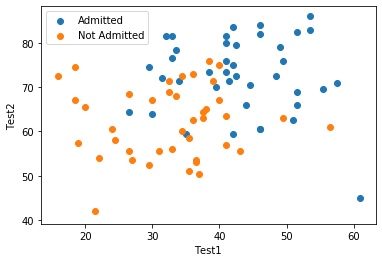

In [25]:
groups = ("Admitted","Not Admitted")

admit = data[data[:,3]==1]
nadmit = data[data[:,3]==0]

fig = plt.figure()
for ii in [admit,nadmit]:
    lbl = np.unique(ii[:,3])
    if lbl == 1:
        lbl = "Admitted"
    else:
        lbl = "Not Admitted"
        
    plt.scatter(ii[:,0],ii[:,1],label=lbl)
    
    plt.xlabel("Test1")
    plt.ylabel("Test2")
    plt.legend(loc=2)

## 3.2 - Logistic function

Text(0.5, 1.0, 'Logistic function')

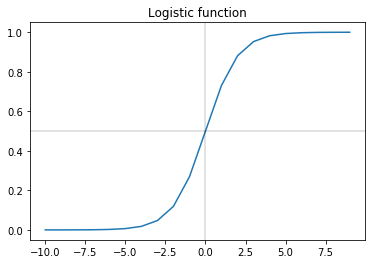

In [26]:
def g(z): 
    return 1/(1 + math.e**(-z))

fig = plt.figure()
plt.plot(np.arange(-10,10),g(np.arange(-10,10)))
plt.axvline(0,c='black',alpha=0.15)
plt.axhline(0.5,c='black',alpha=0.15)
plt.title("Logistic function")

The output of g is the probability of a binary outcome. The value of g(0), as marked on the plot, is 0.5. This means that, at this point, both outcomes have an equal probability of ocurring.

## 3.3 - Newton's Method

In [27]:
def newtonMethod(x,w,epochs=25):
    
    # create empty array to store errors
#     E = np.empty(np.size(x,0))

    
    Error = np.empty(epochs)
    for j in range(epochs):
        E = 0
        hess = np.zeros([np.size(x,1)-1,np.size(x,1)-1])
        grad = np.zeros(np.size(x,1)-1)
        
        for i in range(np.size(x,0)):
            curr_x = x[i,:-1].reshape(3,1)
            w = w.reshape(3,1)
            
            # classify
            wtx = np.dot(w.T,curr_x)
            z = 1/(1 + math.e**(-wtx))

            # desired output
            T = int(x[i,3])

            # calculate error
            e = T - z
            
            hess = hess + z*(1-z)*np.dot(curr_x,curr_x.T)
            hess = hess.reshape(3,3)
            
            grad = grad + (z-T)*curr_x.T
            grad = grad.reshape(1,3)
            
            # Classification error
            E += ((-T*np.log(z)) - ((1-T)*np.log(1-z)))
        
        Hess = hess/np.size(x,0)
        Grad = grad/np.size(x,0)

        # update weights
        w = w - np.dot(np.linalg.inv(Hess),Grad.T)
        
        Error[j] = E/np.size(x,0)
            
    return Error,w

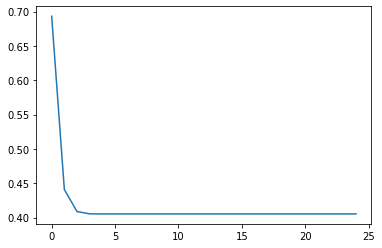

In [28]:
np.random.shuffle(data)
weights = np.zeros(np.size(data,1)-1)

error,wts = newtonMethod(data,weights)

fig = plt.figure()
plt.plot(range(25),error)

## 3.4 - Decision Boundary

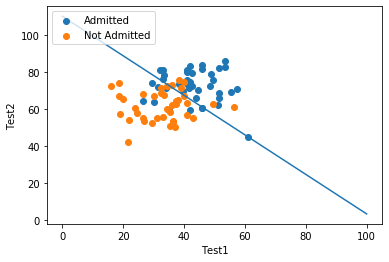

In [29]:
xx = np.array([0,100])
yy = ((-1/wts[0])*(wts[1]*xx + wts[2]))
fig = plt.figure()
plt.plot(xx,yy)

groups = ("Admitted","Not Admitted")

admit = data[data[:,3]==1]
nadmit = data[data[:,3]==0]

for ii in [admit,nadmit]:
    lbl = np.unique(ii[:,3])
    if lbl == 1:
        lbl = "Admitted"
    else:
        lbl = "Not Admitted"
        
    plt.scatter(ii[:,0],ii[:,1],label=lbl)
    
    plt.xlabel("Test1")
    plt.ylabel("Test2")
    plt.legend(loc=2)

## 3.5 - Probability

In [30]:
p  = 1 - 1/(1+math.e**(-np.dot(wts.T,np.array([20,80,1]))))
print(p)

[0.66802186]
